Número de canales:  1
Frecuancia de Muestreo:  16000
Tamaño de las Muestras:  2
Número de muestras:  80000
Parámetros:  _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=80000, comptype='NONE', compname='not compressed')
Duración:  5.0 seconds
Forma de array:  (80000,)


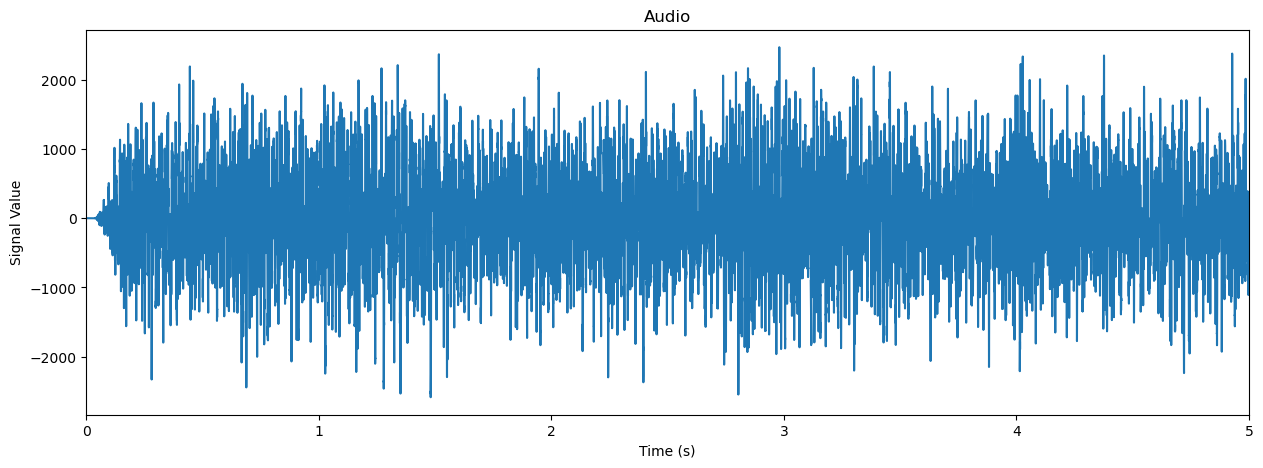

C:\Users\Orfeo\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:7947: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


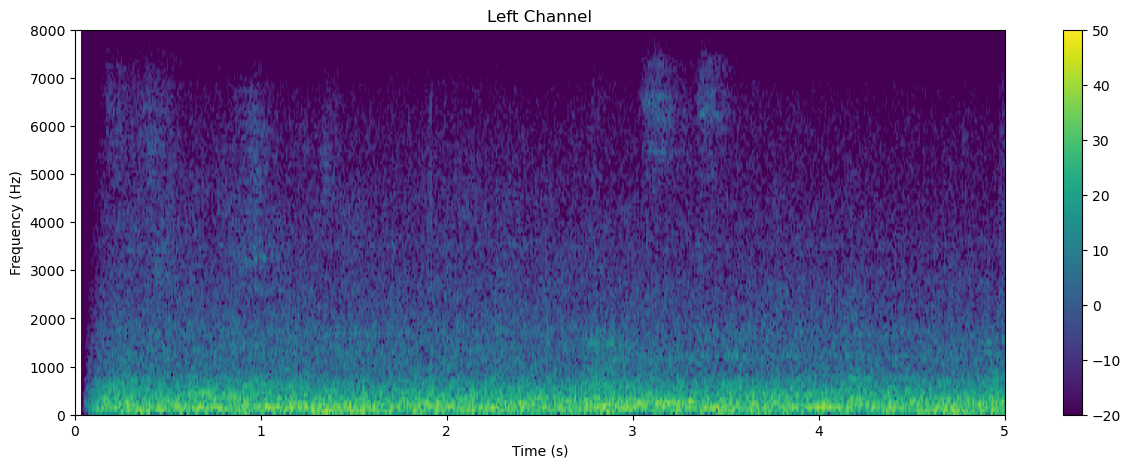

In [3]:
import wave # Librería para manejar archivos WAV
import numpy as np
import matplotlib.pyplot as plt

# Abrimos el archivo de audio en modo lectura ('r')
wav_obj = wave.open('output.wav', 'r')

n_channels = wav_obj.getnchannels()
print("Número de canales: ", n_channels)

sample_freq = wav_obj.getframerate()
print("Frecuancia de Muestreo: ", sample_freq)

# Obtener el tamaño de las muestras en bytes (bits por muestra / 8)
sample_width = wav_obj.getsampwidth()
print("Tamaño de las Muestras: ", sample_width)

n_samples = wav_obj.getnframes()
print("Número de muestras: ", n_samples)

params = wav_obj.getparams()
print("Parámetros: ", params)

t_audio = n_samples/sample_freq
print("Duración: ", t_audio, "seconds")

# Leer los datos de audio (muestras) desde el archivo WAV
signal_wave = wav_obj.readframes(n_samples)

# Convertir los datos binarios en un array NumPy de tipo int16 (valores de audio)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print("Forma de array: ", signal_array.shape)

# Para archivos estéreo, separar los dos canales (izquierdo y derecho)
#l_channel = signal_array[0::2]
#r_channel = signal_array[1::2]

# Crear un array de tiempo para graficar la onda de audio
times = np.linspace(0, n_samples/sample_freq, num=n_samples)

# Graficar la señal de audio en el dominio del tiempo
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

# Graficar el espectrograma del audio
plt.figure(figsize=(15, 5))
plt.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()


Número de canales:  2
Frecuencia de Muestreo:  44100
Tamaño de las Muestras:  2
Número de muestras:  185220
Parámetros:  _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=185220, comptype='NONE', compname='not compressed')
Duración:  4.2 seconds
Forma de array antes de separar canales:  (370440,)
Forma de los canales después de separar:  (185220,) (185220,)


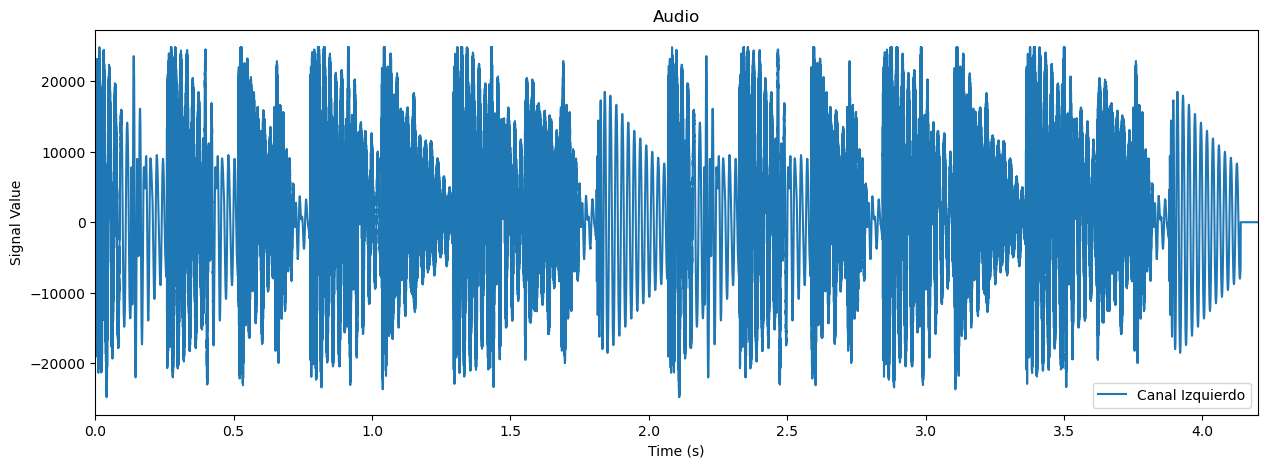

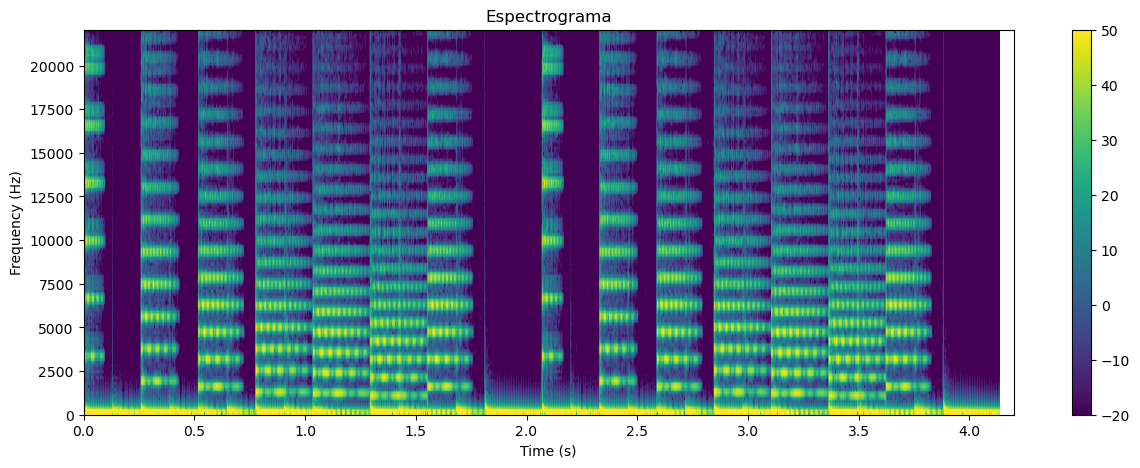

In [5]:
import wave  # Librería para manejar archivos WAV
import numpy as np
import matplotlib.pyplot as plt

# Abrimos el archivo de audio en modo lectura ('r')
wav_obj = wave.open('loop.wav', 'r')

# Obtener información básica del archivo de audio
n_channels = wav_obj.getnchannels()
print("Número de canales: ", n_channels)

sample_freq = wav_obj.getframerate()
print("Frecuencia de Muestreo: ", sample_freq)

sample_width = wav_obj.getsampwidth()
print("Tamaño de las Muestras: ", sample_width)

n_samples = wav_obj.getnframes()
print("Número de muestras: ", n_samples)

params = wav_obj.getparams()
print("Parámetros: ", params)

t_audio = n_samples / sample_freq
print("Duración: ", t_audio, "seconds")

# Leer los datos de audio (muestras) desde el archivo WAV
signal_wave = wav_obj.readframes(n_samples)

# Convertir los datos binarios en un array NumPy de tipo int16 (valores de audio)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print("Forma de array antes de separar canales: ", signal_array.shape)

# Si el archivo es estéreo (dos canales), separar los canales
if n_channels == 2:
    signal_array = signal_array.reshape(-1, 2)  # Reorganiza los datos en dos columnas (L, R)
    l_channel = signal_array[:, 0]  # Canal izquierdo
    r_channel = signal_array[:, 1]  # Canal derecho
    print("Forma de los canales después de separar: ", l_channel.shape, r_channel.shape)
else:
    l_channel = signal_array  # Si es mono, no hay separación

# Crear un array de tiempo para graficar la onda de audio
times = np.linspace(0, t_audio, num=len(l_channel))

# Graficar la señal del canal izquierdo en el dominio del tiempo
plt.figure(figsize=(15, 5))
plt.plot(times, l_channel, label="Canal Izquierdo" if n_channels == 2 else "Señal Mono")
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.legend()
plt.show()

# Graficar el espectrograma del audio (usando solo el canal izquierdo si es estéreo)
plt.figure(figsize=(15, 5))
plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Espectrograma')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

In [7]:
# ======================================================
#  ____                            _                   
# |  _ \ ___  ___ _   _ _ __   ___| |__   ___ _ __ ___ 
# | |_) / _ \/ __| | | | '_ \ / __| '_ \ / _ \ '__/ __|
# |  _ <  __/\__ \ |_| | | | | (__| | | |  __/ |  \__ \
# |_| \_\___||___/\__,_|_| |_|\___|_| |_|\___|_|  |___/
#                                                      
#  Copia de archivos WAV con Python
#  Este script copia un archivo de audio WAV
#  y crea una nueva versión con el nombre 'copy.wav'.
# ======================================================

import wave

# Abrir el archivo WAV original en modo lectura binaria ('rb')
obj = wave.open("loop.wav", 'rb')

# Obtener los parámetros del archivo original
n_channels = obj.getnchannels()
sample_width = obj.getsampwidth()
sample_rate = obj.getframerate()
n_frames = obj.getnframes()

# Leer todos los frames del archivo original
frames = obj.readframes(n_frames)

# Cerrar el archivo original después de leerlo
obj.close()

# Crear un nuevo archivo WAV en modo escritura binaria ('wb')
new_obj = wave.open("copy.wav", 'wb')

# Configurar los mismos parámetros del archivo original
new_obj.setnchannels(n_channels)
new_obj.setsampwidth(sample_width)
new_obj.setframerate(sample_rate)

# Escribir los frames en el nuevo archivo
new_obj.writeframes(frames)



# Cerrar el nuevo archivo de audio
new_obj.close()

print("Copia del archivo de audio creada exitosamente como 'copy.wav'.")


Copia del archivo de audio creada exitosamente como 'copy.wav'.


In [11]:
!pip3 install pyaudio

   ---------------------------------------- 0.0/164.1 kB ? eta -:--:--
   ---- ---------------------------------- 20.5/164.1 kB 640.0 kB/s eta 0:00:01
   ---------------------- ----------------- 92.2/164.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 164.1/164.1 kB 1.6 MB/s eta 0:00:00


In [15]:
# ======================================================
#  ____                            _                   
# |  _ \ ___  ___ _   _ _ __   ___| |__   ___ _ __ ___ 
# | |_) / _ \/ __| | | | '_ \ / __| '_ \ / _ \ '__/ __|
# |  _ <  __/\__ \ |_| | | | | (__| | | |  __/ |  \__ \
# |_| \_\___||___/\__,_|_| |_|\___|_| |_|\___|_|  |___/
#                                                      
#  Grabación de audio con PyAudio
#  Este script graba audio desde el micrófono
#  y lo guarda en un archivo WAV llamado 'output.wav'.
# ======================================================

import pyaudio
import wave

# Número de cuadros (frames) por buffer de audio (cuántos frames leer por vez)
FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

# Crear instancia de PyAudio para manejar el flujo de audio
p = pyaudio.PyAudio()

# Abrir el stream de audio para grabar. Este es el flujo de entrada.
stream = p.open(
   format=FORMAT,              # El formato del audio (16 bits por muestra en este caso)
   channels=CHANNELS,          # El número de canales (1 para mono)
   rate=RATE,                  # La tasa de muestreo (16000 samples por segundo)
   input=True,                 # Esto indica que estamos grabando (entrada)
   frames_per_buffer=FRAMES_PER_BUFFER  # El número de frames que leemos a la vez
)

print("start recording...")

frames = []  # Lista para almacenar las muestras de audio grabadas
seconds = 5  # Duración de la grabación en segundos

# Ciclo para grabar durante 'seconds' segundos. Calculamos cuántas iteraciones se necesitan
for i in range(0, int(RATE / FRAMES_PER_BUFFER * seconds)):
    data = stream.read(FRAMES_PER_BUFFER)  # Leer los datos de audio del stream
    frames.append(data)  # Agregar los datos a la lista de frames

# Imprimir un mensaje cuando la grabación ha terminado
print("recording stopped")

# Detener y cerrar el flujo de audio
stream.stop_stream()
stream.close()

# Terminar la instancia de PyAudio
p.terminate()

# Abrir el archivo WAV para guardar la grabación
wf = wave.open("output.wav", 'wb')

# Configurar los parámetros del archivo WAV (canales, ancho de muestra y tasa de muestreo)
wf.setnchannels(CHANNELS)                    # Número de canales de audio (mono)
wf.setsampwidth(p.get_sample_size(FORMAT))   # Ancho de muestra (tamaño en bytes de cada muestra)
wf.setframerate(RATE)                        # Tasa de muestreo (samples por segundo)

# Escribir los frames grabados en el archivo de salida
wf.writeframes(b''.join(frames))  # Convertir los frames a un solo bloque de bytes

# Cerrar el archivo WAV después de escribir los datos
wf.close()


start recording...
recording stopped


In [21]:
!pip install pydub
#También es necesario instalar FFmpeg Full (https://www.gyan.dev/ffmpeg/builds/), poner el archivo descomprimido en C:\, y luego añadir C:\ffmpeg\bin a la variable de entorno PATH.

In [17]:
# ======================================================
#  ____                            _                   
# |  _ \ ___  ___ _   _ _ __   ___| |__   ___ _ __ ___ 
# | |_) / _ \/ __| | | | '_ \ / __| '_ \ / _ \ '__/ __|
# |  _ <  __/\__ \ |_| | | | | (__| | | |  __/ |  \__ \
# |_| \_\___||___/\__,_|_| |_|\___|_| |_|\___|_|  |___/
#                                                      
#  Manipulación de audio con pydub
#  Este script modifica un archivo de audio:
#  - Aumenta el volumen
#  - Repite el audio
#  - Aplica un fade-in
# ======================================================

from pydub import AudioSegment

audio = AudioSegment.from_wav("end-of-the-world.wav")  # Carga el archivo WAV
# audio = AudioSegment.from_mp3("mashup.mp3")  # Alternativamente, carga un archivo MP3

# Aumentar el volumen en 6dB. El operador "+" aumenta el volumen en el valor especificado.
audio = audio + 6  # Sumar 6 decibelios al volumen del audio

# Repetir el clip de audio dos veces. Esto crea una versión extendida del audio original.
audio = audio * 2  # Multiplicar el audio para repetirlo dos veces

# Agregar un "fade in" (desvanecimiento gradual) de 2 segundos al inicio del audio.
# El parámetro 2000 especifica la duración en milisegundos (2000 ms = 2 segundos)
audio = audio.fade_in(1000)  # Fade-in de 1 segundo

# Exportar el audio modificado a un archivo MP3.
audio.export("mashup.mp3", format="mp3")
print("Archivo de audio creado exitosamente.")

Archivo de audio creado exitosamente.


In [19]:
!pip install -U assemblyai

In [21]:
# ======================================================
#  ____                            _                   
# |  _ \ ___  ___ _   _ _ __   ___| |__   ___ _ __ ___ 
# | |_) / _ \/ __| | | | '_ \ / __| '_ \ / _ \ '__/ __|
# |  _ <  __/\__ \ |_| | | | | (__| | | |  __/ |  \__ \
# |_| \_\___||___/\__,_|_| |_|\___|_| |_|\___|_|  |___/
#                                                      
#  Transcripción de audio con AssemblyAI
#  Este script transcribe un archivo de audio
#  utilizando la API de AssemblyAI.
# ======================================================

import assemblyai as aai

#Registrate en https://www.assemblyai.com para obtener la clave API
# Reemplaza con tu clave API
aai.settings.api_key = ""

# URL del archivo de audio que se va a transcribir
FILE_URL = "https://assembly.ai/wildfires.mp3"

# Crear una instancia del transcriptor de AssemblyAI
transcriber = aai.Transcriber()

# Llamada al método 'transcribe' para iniciar la transcripción del archivo de audio
transcript = transcriber.transcribe(FILE_URL)

# Verifica si la transcripción tuvo un error
if transcript.status == aai.TranscriptStatus.error:
    print(transcript.error)
else:
    # Si la transcripción fue exitosa, imprime el texto resultante.
    print(transcript.text)


Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US Skylines from Maine to Maryland to Minnesota are gray and smoggy. And in some places, the air quality warnings include the warning to stay inside. We wanted to better understand what's happening here and why, so we called Peter DeCarlo, an associate professor in the Department of Environmental Health and Engineering at Johns Hopkins University. Good morning, Professor. Good morning. So what is it about the conditions right now that have caused this round of wildfires to affect so many people so far away? Well, there's a couple of things. The season has been pretty dry already, and then the fact that we're getting hit in the US is because there's a couple weather systems that are essentially channeling the smoke from those Canadian wildfires through Pennsylvania into the mid Atlantic and the Northeast and kind of just dropping the smoke there. So what is it in this haze that makes it harmful? A

In [27]:
# ======================================================
#  ____                            _                   
# |  _ \ ___  ___ _   _ _ __   ___| |__   ___ _ __ ___ 
# | |_) / _ \/ __| | | | '_ \ / __| '_ \ / _ \ '__/ __|
# |  _ <  __/\__ \ |_| | | | | (__| | | |  __/ |  \__ \
# |_| \_\___||___/\__,_|_| |_|\___|_| |_|\___|_|  |___/
#                                                      
#  Transcripción de audio con AssemblyAI
#  Este script transcribe un archivo de audio local
#  utilizando la API de AssemblyAI.
# ======================================================

import assemblyai as aai

# Reemplaza con tu clave API
aai.settings.api_key = ""

# Convertir el archivo de audio a formato MP3 (si no está en MP3)
audio = AudioSegment.from_wav("voice.wav") 
audio.export("transcript.mp3", format="mp3")

# Ruta del archivo de audio a transcribir
FILE = "transcript.mp3"

# Crear un transcriptor
transcriber = aai.Transcriber()
transcript = transcriber.transcribe(FILE)

# Manejo de errores en la transcripción
if transcript.status == aai.TranscriptStatus.error:
    print(transcript.error)
else:
    print(transcript.text)

No free man shall be seized or imprisoned or stripped of his rights or possessions, or outlawed or exiled or deprived of his standing in any way. Nor will we proceed with force against him or send others to do so, except by the lawful judgment of his equals or by the law of the land.


In [19]:
!pip install transformers torch tf-keras

In [21]:
from transformers import pipeline

# Crear un pipeline de reconocimiento automático de voz (ASR)
# utilizando el modelo preentrenado "openai/whisper-small"
cls = pipeline("automatic-speech-recognition", model="openai/whisper-small")

# Procesar el archivo de audio "voice.wav" y convertirlo en texto
res = cls("voice.wav")

print(res)

RuntimeError: Failed to import transformers.models.whisper.modeling_tf_whisper because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [23]:
!pip install gtts

  Using cached gTTS-2.5.4-py3-none-any.whl.metadata (4.1 kB)
Using cached gTTS-2.5.4-py3-none-any.whl (29 kB)


In [25]:
from gtts import gTTS

language = "en"
text = "To find yourself, think for yourself."

speech = gTTS(text=text, lang=language, slow=False, tld="com.au")
speech.save("textToSpeech.mp3")

In [11]:
# ======================================================
#  ____  ____  _   _ _   _ _  __ ___  _   _ 
# |  _ \|  _ \| | | | | | | |/ /|_ _|| \ | |
# | |_) | |_) | | | | | | | ' /  | | |  \| |
# |  _ <|  __/| |_| | |_| | . \  | | | |\  |
# |_| \_\_|    \___/ \___/|_|\_\|___||_| \_|
#                                                      
#  Transcripción de audio en español con AssemblyAI
#  Este script convierte un archivo de audio a MP3
#  y lo transcribe utilizando la API de AssemblyAI.
# ======================================================

import assemblyai as aai
from pydub import AudioSegment

aai.settings.api_key = ""

# Convertir el archivo de audio a formato MP3 (si no está en MP3)
#audio = AudioSegment.from_file("testing.m4a", format="m4a")
audio = AudioSegment.from_wav("flores.wav")
audio.export("transcript_esp.mp3", format="mp3")

FILE = "transcript_esp.mp3"

# Crear un transcriptor
transcriber = aai.Transcriber()

# Configurar la transcripción para español
config = aai.TranscriptionConfig(language_code="es")

# Transcribir el audio con la configuración correcta
transcript = transcriber.transcribe(FILE, config=config)

if transcript.status == aai.TranscriptStatus.error:
    print("Error en la transcripción:", transcript.error)
else:
    print("Texto transcrito en español:")
    print(transcript.text)


Texto transcrito en español:
¿Cuántas flores haces? Se hace nada, siempre compro toda la media. Ah, las flores de calabaza, o sea, eso se hace nada y vende, se los acaba todo. Allá no hay. ¿Allá no hay flores? No, yo creo que en Alemania tampoco. ¿Y qué ran con ellas? Porque hay mucha calabaza, las tiran. ¿Eso es lo peor, que los son de tirar, verdad? Yo ya entendí. ¿Ah, qué calabaza? ¿La flor de calabaza, por qué la tiran allá? Es flor de calabacita. ¿De calabacita? No, es flor de calabaza. Calabaza. ¿Yo entendí que es muy frágil para transportar, quieres? No, y para tenerla, si tú la guardas dos días en el resto. No, pero son calabazas grandes porque tu abuelo, te acuerdas que tenía las calabazas y dijo que ya cuando aprendió aquí ya no las tiraba.


In [7]:
# ======================================================
#  ____  ____  _   _ _   _ _  __ ___  _   _ 
# |  _ \|  _ \| | | | | | | |/ /|_ _|| \ | |
# | |_) | |_) | | | | | | | ' /  | | |  \| |
# |  _ <|  __/| |_| | |_| | . \  | | | |\  |
# |_| \_\_|    \___/ \___/|_|\_\|___||_| \_|
#                                                      
#  Transcripción de audio con AssemblyAI
#  Este script sube un archivo de audio, lo transcribe
#  y guarda el resultado en un archivo de texto.
# ======================================================

import requests
import time

API_KEY_ASSEMBLYAI = ""

# Endpoints de la API de AssemblyAI
upload_endpoint = 'https://api.assemblyai.com/v2/upload'
transcript_endpoint = 'https://api.assemblyai.com/v2/transcript'

# Cabecera para autenticación con la clave API
headers_auth_only = {'authorization': API_KEY_ASSEMBLYAI}

# Cabecera para solicitudes JSON
headers = {
    "authorization": API_KEY_ASSEMBLYAI,
    "content-type": "application/json"
}

CHUNK_SIZE = 5_242_880  # 5MB, tamaño de cada fragmento de carga

def upload(filename):
    # Función para leer el archivo y enviarlo en fragmentos de 5MB
    def read_file(filename):
        with open(filename, 'rb') as f:
            while True:
                data = f.read(CHUNK_SIZE)
                if not data:
                    break
                yield data

    # Realizar la solicitud POST para subir el archivo
    upload_response = requests.post(upload_endpoint, headers=headers_auth_only, data=read_file(filename))
    
    # Comprobar si la solicitud fue exitosa
    if upload_response.status_code == 200:
        return upload_response.json()['upload_url']
    else:
        print(f"Error en la carga: {upload_response.status_code}")
        return None

def transcribe(audio_url):
    # Solicitud de transcripción
    transcript_request = {
        'audio_url': audio_url
    }

    transcript_response = requests.post(transcript_endpoint, json=transcript_request, headers=headers)

    # Comprobar si la solicitud de transcripción fue exitosa
    if transcript_response.status_code == 200:
        return transcript_response.json()['id']
    else:
        print(f"Error en la transcripción: {transcript_response.status_code}")
        return None

def poll(transcript_id):
    # Solicitar el estado de la transcripción
    polling_endpoint = f"{transcript_endpoint}/{transcript_id}"
    polling_response = requests.get(polling_endpoint, headers=headers)
    
    if polling_response.status_code == 200:
        return polling_response.json()
    else:
        print(f"Error al obtener el estado: {polling_response.status_code}")
        return None

def get_transcription_result_url(url):
    # Obtener la ID de transcripción
    transcribe_id = transcribe(url)
    
    if not transcribe_id:
        print("Error al obtener la ID de transcripción.")
        return None, "Error al iniciar la transcripción."

    # Intentar obtener el resultado de la transcripción
    attempts = 0
    while attempts < 10:  # Limitar intentos para evitar bucles infinitos
        data = poll(transcribe_id)
        if data:
            if data['status'] == 'completed':
                return data, None
            elif data['status'] == 'error':
                return data, data['error']
        
        print("Esperando 30 segundos...")
        time.sleep(30)  # Espera de 30 segundos entre cada intento
        attempts += 1

    return None, "La transcripción ha excedido el número de intentos."

def save_transcript(url, title):
    data, error = get_transcription_result_url(url)
    
    if data:
        filename = f"{title}.txt"
        with open(filename, 'w') as f:
            f.write(data['text'])
        print('Transcripción guardada')
    elif error:
        print("¡Error!", error)

if __name__ == "__main__":

    audio = AudioSegment.from_wav("voice.wav")
    audio.export("txt_transcript.mp3", format="mp3")
    
    filename = "txt_transcript.mp3"  # Archivo de audio
    audio_url = upload(filename)  # Subir archivo y obtener la URL
    
    if audio_url:
        save_transcript(audio_url, 'transcript')  # Guardar la transcripción en un archivo de texto
    else:
        print("No se pudo obtener la URL de audio para la transcripción.")


Esperando 30 segundos...
Transcripción guardada


In [59]:
!pip install yt-dlp

     ---------------------------------------- 0.0/171.9 kB ? eta -:--:--
     ---- -------------------------------- 20.5/171.9 kB 330.3 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/171.9 kB 656.4 kB/s eta 0:00:01
     -------------------------------------- 171.9/171.9 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB 9.2 MB/s eta 0:00:01
   ---- ----------------------------------- 0.4/3.2 MB 4.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.4/3.2 MB 4.6 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.2 MB 5.7 MB/s eta 0:00:01
   ---------------- ----------------------- 1.4/3.2 MB 6.2 MB/s eta 0:00:01
   --------------------- ------------------ 1.7/3.2 MB 6.3 MB/s eta 0:00:01
   ------------------------- -------------- 2.0/3.2 MB 6.5 MB/s eta 0:00:01
   ------------------------------ --------- 2.4/3.2 MB 6.7 MB/s eta 0:00:01
   -------

In [3]:
# ======================================================
# ███████╗██╗   ██╗██╗   ██╗███████╗ █████╗ ██╗  ██╗
# ██╔════╝██║   ██║██║   ██║██╔════╝██╔══██╗██║  ██║
# █████╗  ██║   ██║██║   ██║█████╗  ███████║███████║
# ██╔══╝  ██║   ██║██║   ██║██╔══╝  ██╔══██║██╔══██║
# ██║     ╚██████╔╝╚██████╔╝███████╗██║  ██║██║  ██║
# ╚═╝      ╚═════╝  ╚═════╝ ╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝

#                                                      
#  Extracción de URL de audio de YouTube
#  Este script obtiene la URL del audio en formato M4A
#  de un video de YouTube utilizando yt-dlp.
#  Creado por: ryuzak1
# ======================================================

import yt_dlp
from yt_dlp.utils import DownloadError

# Obtiene la información de un video de YouTube sin descargarlo
def get_video_info(url):

    ydl_opts = {"quiet": True}  # Evita mensajes innecesarios en la consola para mantener el código limpio
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        try:
            result = ydl.extract_info(url, download=False)  # Extrae la información sin descargar el archivo
        except DownloadError:  # Captura errores si el video no está disponible o la URL es incorrecta
            print("Error al obtener información del video.")
            return None

    # Si el resultado es una lista (como en el caso de una playlist), se toma el primer video
    return result["entries"][0] if "entries" in result else result

# Extrae la URL del audio en formato M4A si está disponible.
def get_audio_url(video_info):
    """Extrae la URL del audio en formato M4A si está disponible."""
    if not video_info:
        return None

    # Recorre las distintas versiones disponibles del video/audio
    for f in video_info.get("formats", []):
        if f.get("ext") == "m4a":   # Busca específicamente el formato de audio M4A
            return f.get("url")
    
    print("No se encontró un formato M4A.")
    return None


def main():
    """Función principal que obtiene y muestra la URL del audio."""
    video_url = "https://www.youtube.com/shorts/gpo6PoIrXRA"  # Reemplaza con el enlace del video que desees
    video_info = get_video_info(video_url)
    
    if video_info:
        audio_url = get_audio_url(video_info)
        if audio_url:
            print("URL del audio:", audio_url)


if __name__ == "__main__":
    main()


URL del audio: https://rr2---sn-uvu5a2a5t-hxmll.googlevideo.com/videoplayback?expire=1740985276&ei=XP_EZ7aqB53Rlu8P8YCXsQc&ip=189.203.101.25&id=o-AJlFVXzBo5Fbxzhvbcbq-9u50MjTnZRXewE44FLjREoh&itag=140&source=youtube&requiressl=yes&xpc=EgVo2aDSNQ%3D%3D&met=1740963676%2C&mh=Gj&mm=31%2C26&mn=sn-uvu5a2a5t-hxmll%2Csn-q4fl6n6y&ms=au%2Conr&mv=m&mvi=2&pl=24&rms=au%2Cau&initcwndbps=2543750&bui=AUWDL3wVqy6l_u27eArbluV4gn_1UZQigb1PqBaot7i_dWVlrbBsPFiLYNmB5J3a3fhOGdP-5lJg9qP_&spc=RjZbSVeq4i7-gCxSK-ly1dL4cqblhTYo6jGNlVa77hoUOWabvZLTofrZ-aimq_PlpX4&vprv=1&svpuc=1&xtags=drc%3D1&mime=audio%2Fmp4&ns=Wa4eybPchThlAek5-h947WIQ&rqh=1&gir=yes&clen=459236&dur=28.328&lmt=1738044929593313&mt=1740963421&fvip=3&keepalive=yes&lmw=1&fexp=51326932&c=TVHTML5&sefc=1&txp=5432534&n=uGrhj2vTQefH-g&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cxpc%2Cbui%2Cspc%2Cvprv%2Csvpuc%2Cxtags%2Cmime%2Cns%2Crqh%2Cgir%2Cclen%2Cdur%2Clmt&sig=AJfQdSswRgIhAOitUzJ9lRKfPG4Sb0rzy7pVHkg2HsRFKct724x3W_sKAiEA5faVUa0K4hsrIoXqh9na

In [55]:
import json
import requests
import time
import re
import yt_dlp
from yt_dlp.utils import DownloadError


API_KEY_ASSEMBLYAI = ""

# Endpoints de AssemblyAI para subir archivos y transcribir audio
upload_endpoint = 'https://api.assemblyai.com/v2/upload'
transcript_endpoint = 'https://api.assemblyai.com/v2/transcript'

# Encabezados para autenticación en las solicitudes
headers_auth_only = {'authorization': API_KEY_ASSEMBLYAI}

# Encabezados con autorización y tipo de contenido JSON
headers = {
    "authorization": API_KEY_ASSEMBLYAI,
    "content-type": "application/json"
}

# Tamaño del fragmento al leer el archivo en bytes (5MB)
CHUNK_SIZE = 5_242_880 


# Sube un archivo de audio a AssemblyAI y devuelve la URL del archivo subido.
def upload(filename):

    # Generador que lee el archivo en fragmentos de tamaño definido.
    def read_file(filename):
        with open(filename, 'rb') as f:
            while True:
                data = f.read(CHUNK_SIZE)
                if not data:
                    break
                yield data

    # Envía la solicitud para subir el archivo por partes
    upload_response = requests.post(upload_endpoint, headers=headers_auth_only, data=read_file(filename))
    return upload_response.json()['upload_url']  # Devuelve la URL del archivo subido


# Envía una solicitud de transcripción para un archivo de audio en AssemblyAI.
def transcribe(audio_url, sentiment_analysis):
    """
    Parámetros:
    audio_url (str): URL del archivo de audio subido.
    sentiment_analysis (bool): Indica si se debe incluir análisis de sentimiento.

    Retorna:
    str: ID de la transcripción generada.
    """
    transcript_request = {
        'audio_url': audio_url,
        'sentiment_analysis': sentiment_analysis  # Habilita o deshabilita el análisis de sentimientos
    }

    # Envía la solicitud de transcripción
    transcript_response = requests.post(transcript_endpoint, json=transcript_request, headers=headers)
    return transcript_response.json()['id']  # Devuelve el ID de la transcripción



# Consulta el estado de la transcripción.
def poll(transcript_id):
    """
    Parámetros:
    transcript_id (str): ID de la transcripción a consultar.

    Retorna:
    dict: Datos del estado actual de la transcripción.
    """
    polling_endpoint = transcript_endpoint + '/' + transcript_id  # Construye la URL de consulta
    polling_response = requests.get(polling_endpoint, headers=headers)  # Realiza la consulta
    return polling_response.json()  # Devuelve la respuesta en formato JSON


# Obtiene el resultado de la transcripción, esperando hasta que se complete.
def get_transcription_result_url(url, sentiment_analysis):
    """
    Parámetros:
    url (str): URL del archivo de audio a transcribir.
    sentiment_analysis (bool): Indica si se debe incluir análisis de sentimiento.

    Retorna:
    tuple: (datos de la transcripción, error si ocurre alguno).
    """
    transcribe_id = transcribe(url, sentiment_analysis)  # Inicia la transcripción

    while True:
        data = poll(transcribe_id)  # Consulta el estado de la transcripción
        print("Estado de la transcripción:", data['status'])  # Imprime el estado para depuración
        if data['status'] == 'completed':  # Si está lista, devuelve los datos
            return data, None
        elif data['status'] == 'error':  # Si hubo un error, lo devuelve
            error_message = data.get('error', 'Error desconocido')
            print("Error en la transcripción:", error_message)  # Imprime el error
            return data, error_message
            
        print("Esperando 30 segundos...")
        time.sleep(30)  # Espera antes de volver a consultar el estado


# Guarda la transcripción y, si se habilita, el análisis de sentimiento en archivos de texto y JSON.
def save_transcript(url, title, sentiment_analysis=False):
    data, error = get_transcription_result_url(url, sentiment_analysis)  # Obtiene la transcripción

    if data:
        # Guarda el texto de la transcripción en un archivo
        filename = title + '.txt'
        with open(filename, 'w') as f:
            f.write(data['text'])

        # Guarda el análisis de sentimiento si está activado
        if sentiment_analysis:
            filename = title + '_sentiments.json'
            with open(filename, 'w') as f:
                sentiments = data['sentiment_analysis_results']
                json.dump(sentiments, f, indent=4)

            print('Transcripción guardada exitosamente.')
            return True
        else:
            print("No se encontró texto en la transcripción.")
            print("Detalles de la transcripción:", data)  # Muestra los detalles de la transcripción
            return False

    elif error:
        print("Error en la transcripción:", error)
        return False


# Obtiene la información de un video de YouTube sin descargarlo
def get_video_info(url):

    ydl_opts = {"quiet": True}  # Evita mensajes innecesarios en la consola para mantener el código limpio
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        try:
            result = ydl.extract_info(url, download=False)  # Extrae la información sin descargar el archivo
        except DownloadError:  # Captura errores si el video no está disponible o la URL es incorrecta
            print("Error al obtener información del video.")
            return None

    # Si el resultado es una lista (como en el caso de una playlist), se toma el primer video
    return result["entries"][0] if "entries" in result else result

# Extrae la URL del audio en formato M4A si está disponible.
def get_audio_url(video_info):
    """Extrae la URL del audio en formato M4A si está disponible."""
    if not video_info:
        return None

    # Recorre las distintas versiones disponibles del video/audio
    for f in video_info.get("formats", []):
        if f.get("ext") == "m4a":   # Busca específicamente el formato de audio M4A
            return f.get("url")
    
    print("No se encontró un formato M4A.")
    return None



# Obtiene la URL del audio de un video de YouTube y guarda su transcripción junto con el análisis de sentimientos.
def save_video_sentiments(url):

    video_info = get_video_info(url)  # Obtiene información del video (título, duración, etc.)
    url = get_audio_url(video_info)  # Extrae la URL del audio del video


    if url:  
        title = video_info['title']          
        title = re.sub(r'[<>:"/\\|?*]', '_', video_info['title'])  # Reemplaza caracteres no válidos por guiones bajos
        title = title.strip().replace(" ", "_")  # Reemplaza espacios por guiones bajos para el nombre del archivo
        save_transcript(url, title, sentiment_analysis=True)  # Guarda la transcripción con análisis de sentimientos


if __name__ == "__main__":
    save_video_sentiments("https://www.youtube.com/shorts/gpo6PoIrXRA")  # Descomentar para procesar un video específico

    """
    
    # Carga el archivo JSON generado con el análisis de sentimientos
    with open("review.json", "r") as f:
        data = json.load(f)

    # Listas para almacenar frases según su sentimiento
    positives = []
    negatives = []
    neutrals = []

    # Procesa cada resultado del análisis de sentimientos
    for result in data:
        text = result["text"]  # Extrae el fragmento de texto analizado
        if result["sentiment"] == "POSITIVE":
            positives.append(text)  # Agrega a la lista de positivos
        elif result["sentiment"] == "NEGATIVE":
            negatives.append(text)  # Agrega a la lista de negativos
        else:
            neutrals.append(text)  # Agrega a la lista de neutrales

    # Cuenta la cantidad de frases en cada categoría
    n_pos = len(positives)
    n_neg = len(negatives)
    n_neut = len(neutrals)

    # Imprime las cantidades de cada categoría
    print("Num positives:", n_pos)
    print("Num negatives:", n_neg)
    print("Num neutrals:", n_neut)

    # Calcula el ratio de comentarios positivos ignorando los neutrales
    if n_pos + n_neg > 0:
        r = n_pos / (n_pos + n_neg)
        print(f"Positive ratio: {r:.3f}")  # Muestra el porcentaje de comentarios positivos con 3 decimales
    else:
        print("No hay suficientes datos para calcular el ratio.")
    
    """

Estado de la transcripción: queued
Esperando 30 segundos...
Estado de la transcripción: error
Error en la transcripción: Download error, unable to download https://rr2---sn-uvu5a2a5t-hxmll.googlevideo.com/videoplayback?expire=1740974283&ei=a9TEZ9yfOLnpir4PntTRyQ0&ip=189.203.101.25&id=o-AKxJ5ko4EbpA23gv1lZSBW2csQO5bN1iDvCbsJwShEiZ&itag=140&source=youtube&requiressl=yes&xpc=EgVo2aDSNQ%3D%3D&met=1740952683%2C&mh=Gj&mm=31%2C26&mn=sn-uvu5a2a5t-hxmll%2Csn-q4fl6n6y&ms=au%2Conr&mv=m&mvi=2&pl=24&rms=au%2Cau&initcwndbps=2627500&bui=AUWDL3x_TPYljPjGqqoFwS_5Bo5EsY_3xrLSwVsD06_Efja0NghrKoxzOK53owUg-Eyc1_UGWFdmCA4L&spc=RjZbSaEUhM1RaAD9lv-chkhELbJAXFZYZIq93yy6dNfGrWC4pV-Jwl2AaNXyd6OPSMA&vprv=1&svpuc=1&xtags=drc%3D1&mime=audio%2Fmp4&ns=ro9iV57ctLJ3cYC6uLaEOi0Q&rqh=1&gir=yes&clen=459236&dur=28.328&lmt=1738044929593313&mt=1740952137&fvip=3&keepalive=yes&lmw=1&fexp=51326932&c=TVHTML5&sefc=1&txp=5432534&n=INqTue4A_yVzlQ&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cxpc%2Cbui%2Cspc%2Cvprv%2C

TypeError: write() argument must be str, not None

In [59]:
!pip install pyaudio requests websockets openai

In [ ]:
"""
Este script no debe ejecutarse en Jupyter Notebooks, sino desde la terminal.

Este script utiliza PyAudio para capturar audio en tiempo real,
AssemblyAI para la transcripción y OpenAI para generar respuestas a partir del texto transcrito.
"""

import pyaudio
import websockets
import asyncio
import base64
import json
import openai

# Claves de API para AssemblyAI y OpenAI (se recomienda no exponerlas en código en producción)
API_KEY_ASSEMBLYAI = ''
API_KEY_OPENAI = ''

# Asignar la clave de API de OpenAI
openai.api_key = API_KEY_OPENAI

# Configuración del audio
FRAMES_PER_BUFFER = 3200  # Tamaño del buffer de audio
FORMAT = pyaudio.paInt16  # Formato del audio (16-bit PCM)
CHANNELS = 1  # Número de canales (1 para mono)
RATE = 16000  # Frecuencia de muestreo en Hz

# Inicializar PyAudio
p = pyaudio.PyAudio()
 
# Iniciar la grabación de audio
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)

# Mostrar información del dispositivo de entrada predeterminado
print(p.get_default_input_device_info())

# URL de la API de AssemblyAI para transcripción en tiempo real
URL = "wss://api.assemblyai.com/v2/realtime/ws?sample_rate=16000"

# Función para generar una respuesta con OpenAI
def ask_computer(prompt):
    return "This is my answer"  # Placeholder para la respuesta de OpenAI

    # Enviar el prompt a OpenAI y recibir la respuesta
    res = openai.Completion.create(
        engine="text-davinci-002",  # Modelo de OpenAI a utilizar
        prompt=prompt,  # Texto que se envía como entrada al modelo
    )
    return res["choices"][0]["text"]  # Devolver el texto de la respuesta

# Función asincrónica para enviar y recibir datos con AssemblyAI
async def send_receive():
    print(f'Connecting websocket to url ${URL}')
    async with websockets.connect(
        URL,
        extra_headers=(("Authorization", API_KEY_ASSEMBLYAI),),
        ping_interval=5,  # Intervalo de ping para mantener la conexión
        ping_timeout=20  # Tiempo de espera antes de cerrar la conexión por inactividad
    ) as _ws:
        await asyncio.sleep(0.1)
        print("Receiving SessionBegins ...")
        session_begins = await _ws.recv()
        print(session_begins)
        print("Sending messages ...")

        # Función para enviar audio al servidor
        async def send():
            while True:
                try:
                    data = stream.read(FRAMES_PER_BUFFER, exception_on_overflow=False)
                    data = base64.b64encode(data).decode("utf-8")  # Codificar en Base64
                    json_data = json.dumps({"audio_data": str(data)})
                    await _ws.send(json_data)  # Enviar datos de audio al servidor
                except websockets.exceptions.ConnectionClosedError as e:
                    print(e)
                    assert e.code == 4008  # Error esperado en caso de desconexión
                    break
                except Exception as e:
                    assert False, "Not a websocket 4008 error"
                await asyncio.sleep(0.01)  # Pequeña pausa para evitar saturación
            return True
      
        # Función para recibir transcripción en tiempo real
        async def receive():
            while True:
                try:
                    result_str = await _ws.recv()
                    result = json.loads(result_str)  # Convertir la respuesta JSON en un diccionario
                    prompt = result['text']  # Obtener el texto transcrito
                    if prompt and result['message_type'] == 'FinalTranscript':
                        print("Me:", prompt)
                        answer = ask_computer(prompt)  # Obtener respuesta de OpenAI
                        print("Bot", answer)
                except websockets.exceptions.ConnectionClosedError as e:
                    print(e)
                    assert e.code == 4008  # Error esperado en caso de desconexión
                    break
                except Exception as e:
                    assert False, "Not a websocket 4008 error"
      
        # Ejecutar ambas funciones asincrónicas simultáneamente
        send_result, receive_result = await asyncio.gather(send(), receive())

# Ejecutar la función principal asincrónica
asyncio.run(send_receive())

In [41]:
!pip3 install livekit-agents livekit-plugins-openai livekit-plugins-silero python-dotenv

In [ ]:
"""
===============================================================
  ESTE SCRIPT ES UN ASISTENTE DE VOZ BASADO EN LIVEKIT Y OPENAI
===============================================================
  - Se conecta a un servidor LiveKit para transmisión de audio.
  - Utiliza OpenAI para transcripción, generación de respuestas y síntesis de voz.
  - Maneja eventos de voz en tiempo real con LiveKit y Silero.
  - No debe ejecutarse en Jupyter Notebooks, sino desde la terminal.
"""

"""
Crear una cuenta en LiveKit, luego crear un nuevo proyecto, después obtener las keys en la sección de settings (Crear la key con el nombre deseado).
Obtener una API KEY para ChatGPT en https://platform.openai.com/settings/organization/api-keys.
Colocar las keys dentro de un archivo de variables de entorno .env.
"""

"""
Crear el entorno virtual --> Set-ExecutionPolicy Unrestricted -Scope Process --> conda create --name LiveKit python=3.11 --> conda activate LiveKit --> Instalar los paquetes
Conectar el agente a la sala con "python main.py start" (el parametro "dev" para reconectarse)
Ir https://agents-playground.livekit.io/ y seleccionar el proyecto
Otorgar permisos de acceso al micrófono desde el navegador.  Luego, verifica que el chatbot se haya conectado tanto a la sala como al agente dentro de Livekit. 
Esto puedes confirmarlo revisando los indicadores de conexión en la interfaz de Livekit o a través de los logs de la consola, donde deberías ver mensajes que indiquen una conexión establecida tanto con la sala como con el agente.
"""

LIVEKIT_URL="wss://chatbot-z..."
LIVEKIT_API_SECCRET=""
LIVEKIT_API_KEY=""
OPENAI_API_KEY=""

# ADVERTENCIA: No incluyas claves de API directamente en el código.
# Guarda las claves en un archivo ".env" y usa dotenv para cargarlas.

import asyncio
from dotenv import load_dotenv  # Carga las variables de entorno desde un archivo .env
from livekit.agents import AutoSubscribe, JobContext, WorkerOptions, cli, llm
from livekit.agents.voice_assistant import VoiceAssistant
from livekit.plugins import openai, silero

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Función principal asincrónica que maneja la ejecución del asistente de voz
async def entrypoint(ctx: JobContext):
    # Contexto inicial del chat, define la personalidad del asistente
    initial_ctx = llm.ChatContext().append(
        role="system",
        text=(
            "You are a voice assistant created by LiveKit. Your interface with users will be voice. "
            "You should use short and concise responses, avoiding unpronounceable punctuation."
        ),
    )
    
    # Conectar al entorno LiveKit con suscripciones solo de audio
    await ctx.connect(auto_subscribe=AutoSubscribe.AUDIO_ONLY)

    # Configuración del asistente de voz con los modelos de reconocimiento y síntesis de voz
    assistant = VoiceAssistant(
        vad=silero.VAD.load(),  # Detector de voz de Silero
        stt=openai.STT(),  # Reconocimiento de voz usando OpenAI
        llm=openai.LLM(),  # Modelo de lenguaje de OpenAI para procesar el texto
        tts=openai.TTS(),  # Conversión de texto a voz con OpenAI
        chat_ctx=initial_ctx,  # Contexto inicial del chat
    )
    
    # Iniciar el asistente en la sala de LiveKit
    assistant.start(ctx.room)
    
    # Pequeña pausa para asegurar que el asistente esté listo antes de hablar
    await asyncio.sleep(1)
    
    # El asistente saluda al usuario al iniciar
    await assistant.say("Hey, how can I help you today!", allow_interruptions=True)

# Punto de entrada principal del script
if __name__ == "__main__":
    cli.run_app(WorkerOptions(entrypoint_fnc=entrypoint))  # Ejecuta la aplicación con el asistente